# DOMAĆI RAD
### Predmet: Primena projektivne geometrije u računarstvu
### Studentkinja: Anđelka Milovanović
### Broj indeksa: 145/2015

### 1. Naivni algoritam za projekciju tačaka

In [15]:
import numpy as np
points = [[-3, -1, 1],
          [3, -1, 1],
          [1, 1, 1],
          [-1, 1, 1]]

points_proj = [[-2, -1, 1],
               [2, -1, 1],
               [2, 1, 1],
               [-2, 1, 1]]

canonical_points = [[1, 0, 0], 
                    [0, 1, 0], 
                    [0, 0, 1],
                    [1, 1, 1]]

def cramers_rule(points):
    delta = np.float32([[points[0][0], points[1][0], points[2][0]],
                        [points[0][1], points[1][1], points[2][1]],
                        [points[0][2], points[1][2], points[2][2]]])

    delta1 = np.float32([[points[3][0], points[1][0], points[2][0]],
                         [points[3][1], points[1][1], points[2][1]],
                         [points[3][2], points[1][2], points[2][2]]])
 
    delta2 = np.float32([[points[0][0], points[3][0], points[2][0]],
                         [points[0][1], points[3][1], points[2][1]],
                         [points[0][2], points[3][2], points[2][2]]])

    delta3 = np.float32([[points[0][0], points[1][0], points[3][0]],
                         [points[0][1], points[1][1], points[3][1]],
                         [points[0][2], points[1][2], points[3][2]]])
    
    delta_det = (np.linalg.det(delta))
    delta1_det = (np.linalg.det(delta1))
    delta2_det = (np.linalg.det(delta2))
    delta3_det = (np.linalg.det(delta3))

    
    lambda1 = delta1_det / delta_det
    lambda2 = delta2_det / delta_det
    lambda3 = delta3_det / delta_det

    return (lambda1, lambda2, lambda3)

def projection_matrix_P(points, points_proj):
    (lambda1, lambda2, lambda3) = cramers_rule(points)
    projection_matrix = np.array([[x*lambda1 for x in points[0]],
                                  [x*lambda2 for x in points[1]],
                                  [x*lambda3 for x in points[2]]])
    projection_matrix = np.transpose(projection_matrix)
    
    (lambda1p, lambda2p, lambda3p) = cramers_rule(points_proj)
    projection_matrix_prim = np.array([[x*lambda1p for x in points_proj[0]],
                                       [x*lambda2p for x in points_proj[1]],
                                       [x*lambda3p for x in points_proj[2]]])
    projection_matrix_prim = np.transpose(projection_matrix_prim)
    
    P = projection_matrix_prim.dot(np.linalg.inv(projection_matrix))
    return (P, lambda1, lambda2, lambda3)

def naive(points, points_proj):
    P_matrix, lambda1, lambda2, lambda3 = projection_matrix_P(points, points_proj)
    return (P_matrix, lambda1, lambda2, lambda3)

P_matrix, lambda1, lambda2, lambda3 = naive(points, points_proj)
P_matrix.round()

array([[ 2.,  0.,  0.],
       [ 0.,  2., -1.],
       [ 0., -1.,  2.]])

###### -------------   PROVERA NAIVNOG ALGORITMA ---------------

In [16]:
D = np.array(points[0]) * lambda1 + np.array(points[1]) * lambda2 + np.array(points[2]) * lambda3
D.round(decimals=4)

array([-1.,  1.,  1.])

#### VIZUALIZACIJA NAIVNOG ALGORITMA

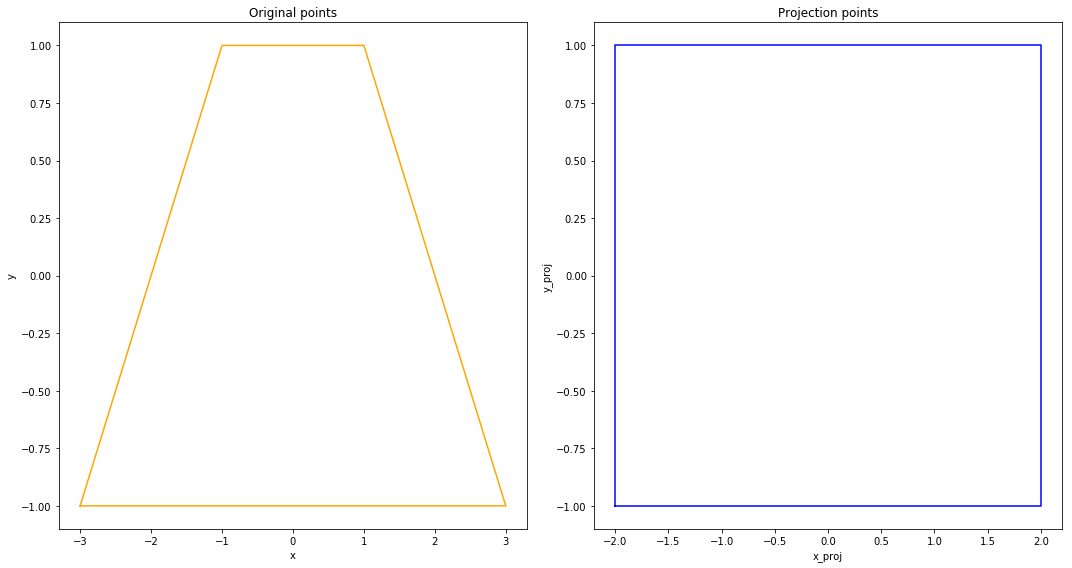

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [i[0] for i in points]
y = [i[1] for i in points]

x.append(points[0][0])
y.append(points[0][1])

fig = plt.subplots(nrows=1, ncols=2, figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Original points")
plt.plot(x, y, 'orange')

xp = [i[0] for i in points_proj]
yp = [i[1] for i in points_proj]

xp.append(points_proj[0][0])
yp.append(points_proj[0][1])

plt.subplot(1, 2, 2)
plt.xlabel('x_proj')
plt.ylabel('y_proj')
plt.title("Projection points")
plt.plot(xp, yp, 'blue')

plt.tight_layout()
plt.show()

#### IMPORTOVANJE SLIKE ZA NAIVNI ALGORITAM

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import math

img = Image.open("box.jpg")
img_copy = Image.new('RGB', (img.size[0], img.size[1]), "black")
print("Image size: {} x {}".format(img.size[1], img.size[0]))
        
# box.jpg
points = [[390, 620, 1],
          [770, 510, 1],
          [775, 300, 1],
          [380, 390, 1]]

points_proj = [[200, 600, 1],
               [800, 600, 1],
               [800, 200, 1],
               [200, 200, 1]]
               
(P, lambda1, lambda2, lambda3) = projection_matrix_P(points, points_proj)

P_inverse = np.linalg.inv(P)
cols = img_copy.size[0]
rows = img_copy.size[1]

for i in range(cols):        
    for j in range(rows):  
        
        new_coordinates = P_inverse.dot([i, j, 1]) # lambda * X' = P * X
        new_coordinates = [(x / new_coordinates[2]) for x in new_coordinates]
        
        if (new_coordinates[0] >= 0 and new_coordinates[0] < cols-1 and \
           new_coordinates[1] >= 0 and new_coordinates[1] < rows-1):
            tmp1 = img.getpixel((math.floor(new_coordinates[0]), math.floor(new_coordinates[1])))
            tmp2 = img.getpixel((math.ceil(new_coordinates[0]), math.ceil(new_coordinates[1])))
            img_copy.putpixel((i, j), tmp2)
       

Image size: 826 x 1024


##### Printujem sliku

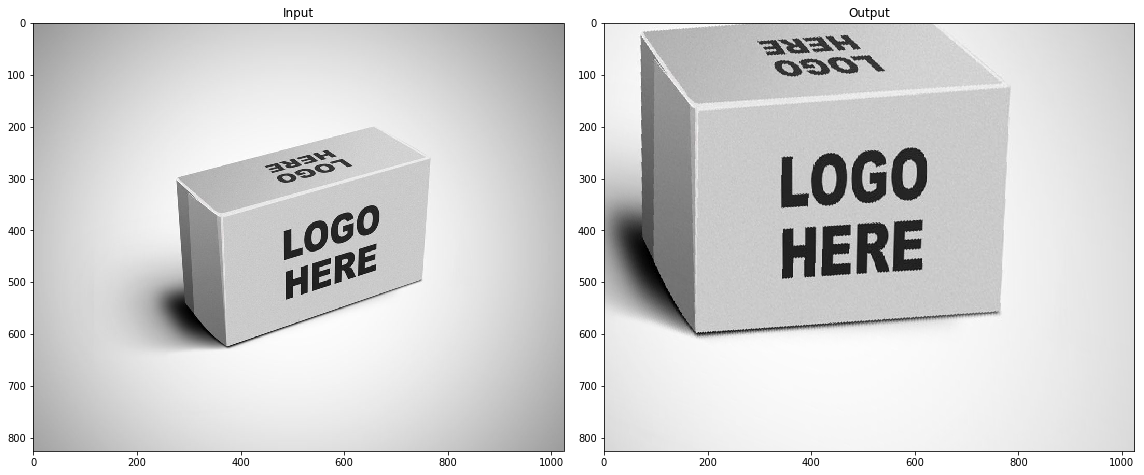

In [19]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(img_copy)
plt.title('Output')

plt.tight_layout()
plt.show()

### 2. DLT algoritam za projektivno preslikavanje

In [20]:
points = [[-3, -1, 1],
          [3, -1, 1],
          [1, 1, 1],
          [-1, 1, 1],
          [1, 2, 3],
          [-8, -2 ,1]]

points_proj = [[-2, -1, 1],
               [2, -1, 1],
               [2, 1, 1],
               [-2, 1, 1],
               [2, 1, 4],
               [-16, -5, 4]]

points = [[a/c, b/c, 1] for [a,b,c] in points]
points_proj = [[a/c, b/c, 1] for [a,b,c] in points_proj]

def dlt(points, points_proj):    
    big_matrix = []
    n = len(points)
    for i in range(n):
        big_matrix.append( [0, 0, 0, 
         -points_proj[i][2]*points[i][0], -points_proj[i][2]*points[i][1], -points_proj[i][2]*points[i][2], 
         points_proj[i][1]*points[i][0], points_proj[i][1]*points[i][1], points_proj[i][1]*points[i][2]])     

        big_matrix.append([points_proj[i][2]*points[i][0], points_proj[i][2]*points[i][1], points_proj[i][2]*points[i][2],
         0, 0, 0,
         -points_proj[i][0]*points[i][0], -points_proj[i][0]*points[i][1], -points_proj[i][0]*points[i][2]])

    _, _, V = np.linalg.svd(big_matrix, full_matrices = True)
    P_matrix_DLT = V[8]*(-1) # (-1 jer eto u Pythonu je tako čudno)
    return P_matrix_DLT

def dlt_rescale(points, points_proj):
    points = [[a/c, b/c, 1] for [a,b,c] in points]
    points_proj = [[a/c, b/c, 1] for [a,b,c] in points_proj]
    
    P_matrix_DLT = dlt(points, points_proj)
    #P_matrix_DLT = P_matrix_DLT.reshape((3,3))
    P_matrix, _, _, _ = naive(points, points_proj)
    
    P_matrix_DLT_scaled = [(x / P_matrix_DLT[0] * P_matrix[0][0]) for x in P_matrix_DLT]
    P_matrix_DLT_rescaled = np.array(P_matrix_DLT_scaled).reshape((3, 3))

    return P_matrix_DLT_rescaled

P_matrix_DLT = dlt(points, points_proj)
P_matrix_DLT.reshape((3,3)).round(decimals=6)

array([[ 0.534522,  0.      , -0.      ],
       [ 0.      ,  0.534522, -0.267261],
       [-0.      , -0.267261,  0.534522]])

### Provera DLT i Naivnog algoritma

In [21]:
P_matrix_DLT_scaled = dlt_rescale(points, points_proj)
P_matrix_DLT_scaled = np.array(P_matrix_DLT_scaled).reshape((3, 3))
P_matrix_DLT_scaled.round()

array([[ 2.,  0., -0.],
       [ 0.,  2., -1.],
       [-0., -1.,  2.]])

In [22]:
P_matrix.round() == P_matrix_DLT_scaled.round()

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import math

img = Image.open("box.jpg")
img_copy = Image.new('RGB', (img.size[0], img.size[1]), "black")
print("Image size: {} x {}".format(img.size[1], img.size[0]))
        
# box.jpg
points = [[390, 620, 1],
          [770, 510, 1],
          [775, 300, 1],
          [380, 390, 1]]

points_proj = [[200, 600, 1],
               [800, 600, 1],
               [800, 200, 1],
               [200, 200, 1]]

points = [[a/c, b/c, 1] for [a,b,c] in points]
points_proj = [[a/c, b/c, 1] for [a,b,c] in points_proj]
               
P_dlt = dlt(points, points_proj)
P_rescaled = np.array(P_dlt).reshape((3, 3))

P_inverse = np.linalg.inv(P_rescaled)
cols = img_copy.size[0]
rows = img_copy.size[1]

for i in range(cols):        
    for j in range(rows):  
        
        new_coordinates = P_inverse.dot([i, j, 1]) # lambda * X' = P * X
        new_coordinates = [(x / new_coordinates[2]) for x in new_coordinates]
        
        if (new_coordinates[0] >= 0 and new_coordinates[0] < cols-1 and \
           new_coordinates[1] >= 0 and new_coordinates[1] < rows-1):
            tmp1 = img.getpixel((math.floor(new_coordinates[0]), math.floor(new_coordinates[1])))
            tmp2 = img.getpixel((math.ceil(new_coordinates[0]), math.ceil(new_coordinates[1])))
            img_copy.putpixel((i, j), tmp2)
       

Image size: 826 x 1024


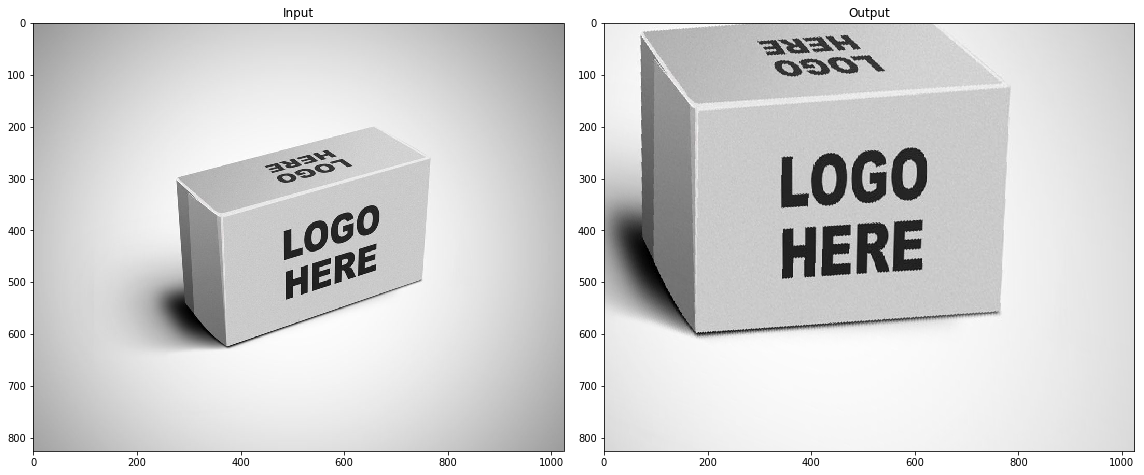

In [24]:
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(img_copy)
plt.title('Output')

plt.tight_layout()
plt.show()

### 3. DLT Normalizacija 

In [25]:
from scipy.spatial import distance
import numpy as np
import math

def dlt(points, points_proj):    
    big_matrix = []
    n = len(points)
    for i in range(n):
        big_matrix.append( [0, 0, 0, 
         -points_proj[i][2]*points[i][0], -points_proj[i][2]*points[i][1], -points_proj[i][2]*points[i][2], 
         points_proj[i][1]*points[i][0], points_proj[i][1]*points[i][1], points_proj[i][1]*points[i][2]])     

        big_matrix.append([points_proj[i][2]*points[i][0], points_proj[i][2]*points[i][1], points_proj[i][2]*points[i][2],
         0, 0, 0,
         -points_proj[i][0]*points[i][0], -points_proj[i][0]*points[i][1], -points_proj[i][0]*points[i][2]])

    _, _, V = np.linalg.svd(big_matrix, full_matrices = True)
    P_matrix_DLT = V[8]*(-1) # (-1 jer eto u Pythonu je tako čudno)
    return P_matrix_DLT

def normalize(ps):
    
    # prvi korak je centar mase
    mass_center_x = sum([a[0] for a in ps]) / len(ps)
    mass_center_y = sum([a[1] for a in ps]) / len(ps)
    
    # drugi korak je translacija
    points_prim = [[a[0]-mass_center_x, a[1]-mass_center_y] for a in ps]
    k = homo_coeff(points_prim)

    T_matrix = [[math.sqrt(2)/k, 0, mass_center_x*(-1)],
                 [0, math.sqrt(2)/k, mass_center_y*(-1)],
                 [0, 0, 1]]
        
    return T_matrix

def homo_coeff(points_prim):
    coeff = sum([math.sqrt(point_prim[0]*point_prim[0] + point_prim[1]*point_prim[1]) \
                 for point_prim in points_prim]) / len(points_prim)
    return coeff

def dlt_normalize(points, points_proj):    
    T_matrix = normalize(points) # 3x3
    T_prim_matrix = normalize(points_proj) # 3x3
    
    T_matrix = np.array(T_matrix).reshape((3,3))
    T_prim_matrix = np.array(T_prim_matrix).reshape((3,3))
  
    points = np.transpose(points) # 3x6
    points_proj = np.transpose(points_proj) # 3x6
    
    M_line = T_matrix.dot(points) # 3x6
    M_prim_line = T_prim_matrix.dot(points_proj) # 3x6
    
    M_line = np.transpose(M_line) # 6x3
    M_prim_line = np.transpose(M_prim_line) # 6x3
    dlt_matrix = dlt(M_line, M_prim_line) # 3x3
    
    dlt_matrix = np.array(dlt_matrix).reshape((3, 3))

    result = (np.linalg.inv(T_prim_matrix)).dot(dlt_matrix).dot(T_matrix)
    return result

In [26]:
points = [[-3, -1, 1],
          [3, -1, 1],
          [1, 1, 1],
          [-1, 1, 1],
          [1, 2, 3],
          [-8, -2 ,1]]

points_proj = [[-2, -1, 1],
               [2, -1, 1],
               [2, 1, 1],
               [-2, 1, 1],
               [2, 1, 4],
               [-16, -5, 4]]

points = [[a/c, b/c, 1] for [a,b,c] in points]
points_proj = [[a/c, b/c, 1] for [a,b,c] in points_proj]

result = dlt_normalize(points, points_proj)
print(result.round(decimals=5))

[[ 0.3603  -0.       0.     ]
 [-0.       0.3603  -0.18015]
 [ 0.      -0.18015  0.3603 ]]


Image size: 826 x 1024


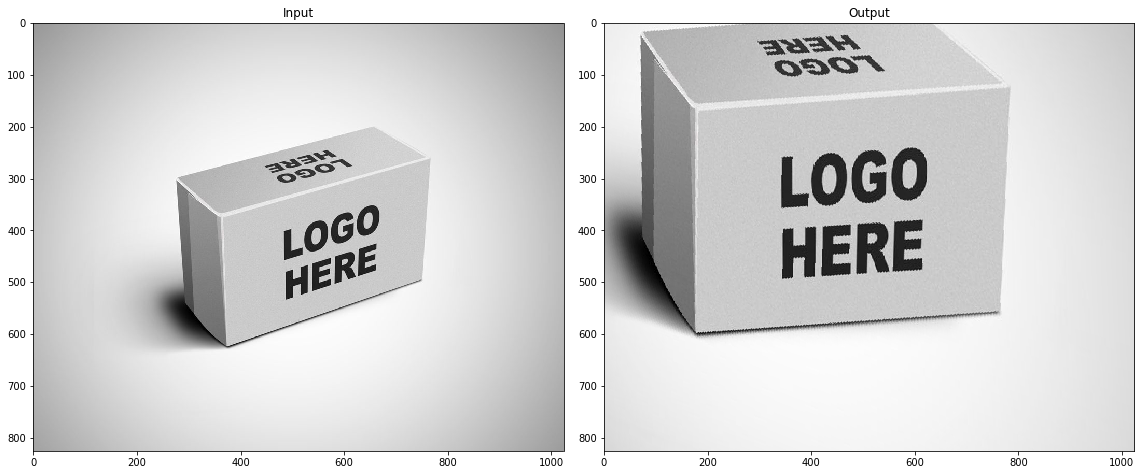

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import math

img = Image.open("box.jpg")
img_copy = Image.new('RGB', (img.size[0], img.size[1]), "black")
print("Image size: {} x {}".format(img.size[1], img.size[0]))
        
# box.jpg
points = [[390, 620, 1],
          [770, 510, 1],
          [775, 300, 1],
          [380, 390, 1]]

points_proj = [[200, 600, 1],
               [800, 600, 1],
               [800, 200, 1],
               [200, 200, 1]]

points = [[a/c, b/c, 1] for [a,b,c] in points]
points_proj = [[a/c, b/c, 1] for [a,b,c] in points_proj]
               
P_dltN = dlt_normalize(points, points_proj)
P_rescaled = np.array(P_dltN).reshape((3, 3))

P_inverse = np.linalg.inv(P_rescaled)
cols = img_copy.size[0]
rows = img_copy.size[1]

for i in range(cols):        
    for j in range(rows):  
        
        new_coordinates = P_inverse.dot([i, j, 1]) # lambda * X' = P * X
        new_coordinates = [(x / new_coordinates[2]) for x in new_coordinates]
        
        if (new_coordinates[0] >= 0 and new_coordinates[0] < cols-1 and \
           new_coordinates[1] >= 0 and new_coordinates[1] < rows-1):
            tmp1 = img.getpixel((math.floor(new_coordinates[0]), math.floor(new_coordinates[1])))
            tmp2 = img.getpixel((math.ceil(new_coordinates[0]), math.ceil(new_coordinates[1])))
            img_copy.putpixel((i, j), tmp2)
       
    
fig = plt.figure(figsize = (16, 9))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(img_copy)
plt.title('Output')

plt.tight_layout()
plt.show()